In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, regularizers

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data_cln = data.fillna({'children': 0.0, 'country': 'Unknown', 'agent':0, 'company': 0})

In [4]:
data_cln['meal'].replace('Undefined', 'SC', inplace = True)

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc

In [6]:
resort_data = data_cln[data_cln.hotel == 'Resort Hotel']

In [7]:
city_data = data_cln[data_cln.hotel == 'City Hotel']

In [8]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"] # hotel

# Separate features and predicted value
features = num_features + cat_features

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

total hotel

In [9]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = RandomForestClassifier(random_state=42,n_jobs=-1)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [10]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [11]:
total_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [12]:
# total
for k, v in total_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.8400151299953617 0.8526024461888371 0.847409955475032
acc 	 0.8638914481949912 0.8720998408576933 0.86874947650557
f1 	 0.8001967293741545 0.820247204237787 0.8119262429976773
pre 	 0.8527253668763103 0.8745492014425554 0.8648415419727178
recall 	 0.7537641880935835 0.7730197470601287 0.7651291233778752


resort hotel

In [13]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = resort_data.drop(["is_canceled"], axis=1)[features]
y = resort_data["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = RandomForestClassifier(random_state=42,n_jobs=-1)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [14]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [15]:
resort_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [16]:
# resort
for k, v in resort_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.7979747926655844 0.8271168944065632 0.8149115059910453
acc 	 0.8627059410883674 0.8821767348976535 0.8704942586120821
f1 	 0.7222222222222222 0.7644710578842315 0.7472915704844961
pre 	 0.8033707865168539 0.8436123348017621 0.8151508031946234
recall 	 0.6559633027522935 0.7153024911032029 0.6899966272509184


city hotel

In [17]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = city_data.drop(["is_canceled"], axis=1)[features]
y = city_data["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = RandomForestClassifier(random_state=42,n_jobs=-1)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [18]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [19]:
city_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [20]:
# city
for k, v in city_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.8537982382269987 0.8637865073241819 0.859449531375135
acc 	 0.8632295474599773 0.874448506239758 0.8697466280095801
f1 	 0.8315478962893961 0.841502227880331 0.8362613035052628
pre 	 0.8725687458081824 0.8878441907320349 0.8794486315097915
recall 	 0.7878787878787878 0.8038682381384104 0.797141205381646


resort to city

In [21]:
x = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

x = preprocessor.fit_transform(x)

train_x = x[data_cln.hotel == 'Resort Hotel']
train_y = y[data_cln.hotel == 'Resort Hotel']

test_x = x[data_cln.hotel == 'City Hotel']
test_y = y[data_cln.hotel == 'City Hotel']

result = []
for i in range(10):
    model = RandomForestClassifier(n_jobs=-1)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [22]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [23]:
rc_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [24]:
# resort to city
for k, v in rc_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.7394720868407784 0.7558487840805987 0.7488178603490223
acc 	 0.7774108155804865 0.7886045632169418 0.7840552124038825
f1 	 0.6566862386748067 0.6877327573365113 0.6742512705850767
pre 	 0.896369284535482 0.9212306349552695 0.9096533589906816
recall 	 0.5101806537369343 0.5578816989909975 0.535852818560812


city to resort

In [25]:
x = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

x = preprocessor.fit_transform(x)

test_x = x[data_cln.hotel == 'Resort Hotel']
test_y = y[data_cln.hotel == 'Resort Hotel']

train_x = x[data_cln.hotel == 'City Hotel']
train_y = y[data_cln.hotel == 'City Hotel']

result = []
for i in range(10):
    model = RandomForestClassifier(n_jobs=-1)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [26]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [27]:
cr_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [28]:
# city to resort
for k, v in cr_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.6070682972030972 0.6135840349399742 0.6110079913515566
acc 	 0.7768846729905142 0.7804043934098852 0.7788617074388418
f1 	 0.3591912819042157 0.3768893911569431 0.36965207513631027
pre 	 0.8720426524491836 0.9009722722362261 0.8860403602752275
recall 	 0.22495953965114188 0.23988491278547025 0.23358208955223883


In [29]:
acc_box = np.array([total_res['acc'], resort_res['acc'], city_res['acc'], rc_res['acc'], cr_res['acc']])
pre_box = np.array([total_res['pre'], resort_res['pre'], city_res['pre'], rc_res['pre'], cr_res['pre']])
rec_box = np.array([total_res['recall'], resort_res['recall'], city_res['recall'], rc_res['recall'], cr_res['recall']])
f1_box = np.array([total_res['f1'], resort_res['f1'], city_res['f1'], rc_res['f1'], cr_res['f1']])
auc_box = np.array([total_res['auc'], resort_res['auc'], city_res['auc'], rc_res['auc'], cr_res['auc']])

In [30]:
np.max(acc_box)

0.8821767348976535

In [31]:
np.min(acc_box)

0.7768846729905142

In [32]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:


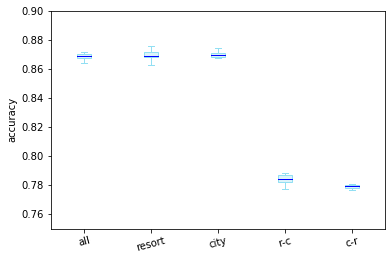

In [33]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(acc_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.75,0.9)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('accuracy')
plt.savefig('RandomForestAcc.png')

In [34]:
pre_box.max()

0.9212306349552695

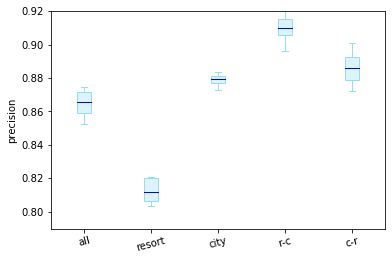

In [35]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(pre_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.79,0.92)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('precision')
plt.savefig('RandomForestPre.png')

In [36]:
rec_box.min()

0.22495953965114188

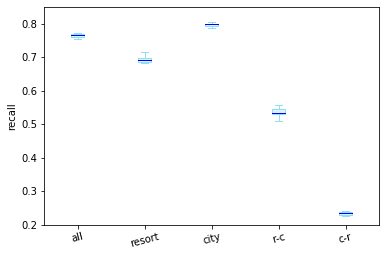

In [37]:
c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(rec_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.2,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('recall')
plt.savefig('RandomForestRec.png')

In [38]:
f1_box.min()

0.3591912819042157

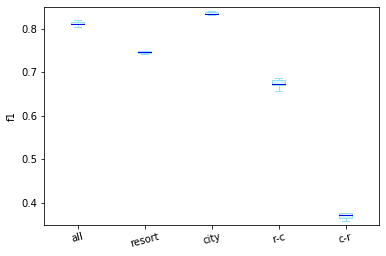

In [39]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(f1_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.35,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('f1')
plt.savefig('RandomForestF1.png')

In [40]:
auc_box.min()

0.6070682972030972

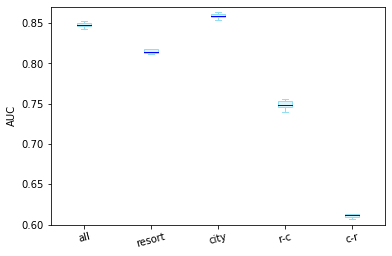

In [41]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(auc_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.60,0.87)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('AUC')
plt.savefig('RandomForestAUC.png')